In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from statsmodels.tsa.vector_ar.var_model import VAR

In [5]:
toyota_data = pd.read_csv("./toyota.csv", encoding="shift-jis",index_col='日付')

In [6]:
toyota_data.index = pd.to_datetime(toyota_data.index)

In [7]:
toyota_data.index = toyota_data.index.tz_localize('Asia/Tokyo')

In [8]:
toyota_data.index = toyota_data.index + pd.Timedelta('0 days 8:00:00')

In [9]:
usdjpy_data = pd.read_csv("USDJPY2.csv", encoding="UTF-8",index_col="日付")

In [10]:
usdjpy_data.index = pd.to_datetime(usdjpy_data.index)

In [11]:
usdjpy_data.index=usdjpy_data.index.tz_localize('US/Eastern')

In [12]:
usdjpy_data.index = usdjpy_data.index + pd.Timedelta('0 days 16:00:00')

In [13]:
usdjpy_data.index =usdjpy_data.index.tz_convert('Asia/Tokyo')

In [14]:
toyota_data.index = toyota_data.index.strftime("%Y/%m/%d")

In [15]:
usdjpy_data.index = usdjpy_data.index.strftime("%Y/%m/%d")

In [16]:
merge = pd.merge(toyota_data,usdjpy_data,left_index=True,right_index=True)

In [17]:
merge.index = pd.to_datetime(merge.index)

In [18]:
merge.head()

,始値_x,高値_x,安値_x,終値_x,出来高,終値調整値,終値_y,始値_y,高値_y,安値_y,前比%
2000-01-04,4990,5000,4860,4940,2229000,4940,101.59,102.11,102.18,101.31,-0.66%
2000-01-05,4690,4900,4670,4890,5388000,4890,103.27,101.46,103.28,101.40,1.65%
2000-01-06,4810,4850,4390,4390,5653000,4390,104.29,103.28,104.40,102.76,0.99%
2000-01-07,4350,4570,4260,4430,4818000,4430,105.33,104.32,105.55,103.97,1.00%
2000-01-11,4680,4720,4600,4620,4164000,4620,105.11,105.12,105.39,104.30,-0.24%


In [20]:
merge=merge[['始値_x','終値_y']]

In [21]:
merge.columns = ['TOYOTA', 'EXCH']

In [22]:
merge.head()

,TOYOTA,EXCH
2000-01-04,4990,101.59
2000-01-05,4690,103.27
2000-01-06,4810,104.29
2000-01-07,4350,105.33
2000-01-11,4680,105.11


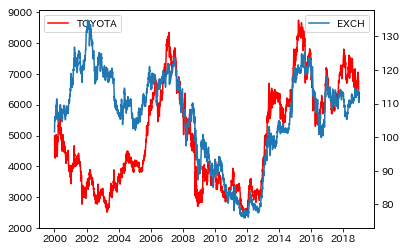

In [23]:
fig, ax1 = plt.subplots()
ax1.plot(merge['TOYOTA'],color='red',linestyle='solid')
ax2 = ax1.twinx()
ax2.plot(merge['EXCH'],linestyle='solid')
ax1.legend()
ax2.legend()